In [1]:
#INSTALL THE REQUIRED LIBRARIES
#pip install pandas
#pip install tensorflow
#pip install matplotlib 

In [2]:
# DATA PREPROCESSING
# Read the dataset

import pandas as pd
df = pd.read_csv("Financial_News.csv")

In [3]:
df.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [5]:
# Clean the Dataset by keeping only Positive and Negative Comments

df = df[df['Sentiment'] != 'neutral']

print(df.shape)
df.head(5)

(2712, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative


In [6]:
# Check the values of the Sentiment column

df["Sentiment"].value_counts()

positive    1852
negative     860
Name: Sentiment, dtype: int64

In [7]:
# Convert Categorical value into Numerical value by using Factorize() method

Sentiment_Label = df.Sentiment.factorize()
Sentiment_Label

(array([0, 1, 0, ..., 0, 1, 0], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [8]:
# Get all text values 

Sentence = df.Sentence.values

In [9]:
Sentence

array(["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
       '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
       "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
       ...,
       "Daily Mail parent company in talks with potential partners about joint bid for Yahoo's internet assets: https://t.co/mK7MEMtADT $YHOO",
       'RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .',
       'HELSINKI AFX - KCI Konecranes said it has won an order for four hot metal ladle cranes from Indian steel producer Bhushan Steel and Strips Ltd. .'],
      dtype=object)

In [10]:
# Tokenise the words [All words/sentences are broken into smaller parts (tokens)]

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(Sentence)
vocab_size = len(tokenizer.word_index) + 1

tokenizer

In [11]:
# Replace words with their assigned numbers

Assigned_num = tokenizer.texts_to_sequences(Sentence)

In [12]:
# Make all sentences of equal length

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(Assigned_num, maxlen=200)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5))
model.add(Dropout(0.5))
                  
                
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           236256    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 252,907
Trainable params: 252,907
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Downgrade your Numpy if the above code results in error.
# pip install -U numpy==1.18.5

In [36]:
# Train the model 
# Validation Split = 30%
# Epoch = 10
# Batch Size = 30
# For quick processing, alter the above inputs.

fit_model = model.fit(padded_sequence,Sentiment_Label[0],validation_split=0.3, epochs=5, batch_size=80)

Train on 1898 samples, validate on 814 samples
Epoch 1/5
1898/1898 [==============================] - 14s 7ms/sample - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.5851 - val_accuracy: 0.8710
Epoch 2/5
1898/1898 [==============================] - 18s 9ms/sample - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.5629 - val_accuracy: 0.8771
Epoch 3/5
1898/1898 [==============================] - 20s 11ms/sample - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.5156 - val_accuracy: 0.8673
Epoch 4/5
1898/1898 [==============================] - 24s 13ms/sample - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.5445 - val_accuracy: 0.8686
Epoch 5/5
1898/1898 [==============================] - 23s 12ms/sample - loss: 0.0235 - accuracy: 0.9916 - val_loss: 0.5415 - val_accuracy: 0.8759


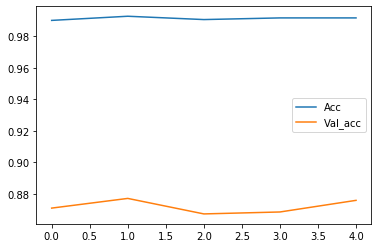

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot the accuracy 

import matplotlib.pyplot as plt

plt.plot(fit_model.history['accuracy'], label='Acc')
plt.plot(fit_model.history['val_accuracy'], label='Val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

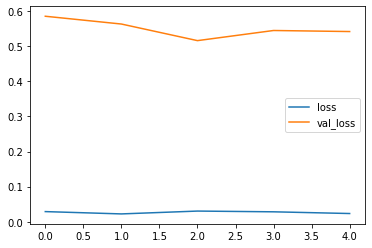

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot loss

plt.plot(fit_model.history['loss'], label='loss')
plt.plot(fit_model.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")


In [41]:
#Execute the model

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ",Sentiment_Label[1][prediction])

test_sentence = input('Enter your statement: ')
predict_sentiment(test_sentence)


Enter your statement: Back Manappuram Finance Q4 Results: Net profit rises 58% to ₹429 crore, dividend declared
Predicted label:  positive
